# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [9]:
# !pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [10]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify `species`, `island`, and `sex`.

In [17]:
# Dummify species, island, and sex with get_dummies
penguins_df = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], dtype = float, drop_first=True)
penguins_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3800.0,2007,0.0,0.0,0.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,2007,0.0,0.0,0.0,1.0,0.0
3,NaN,NaN,NaN,NaN,2007,0.0,0.0,0.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,2007,0.0,0.0,0.0,1.0,0.0


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [18]:
# Drop missing values
penguins_df= penguins_df.dropna()

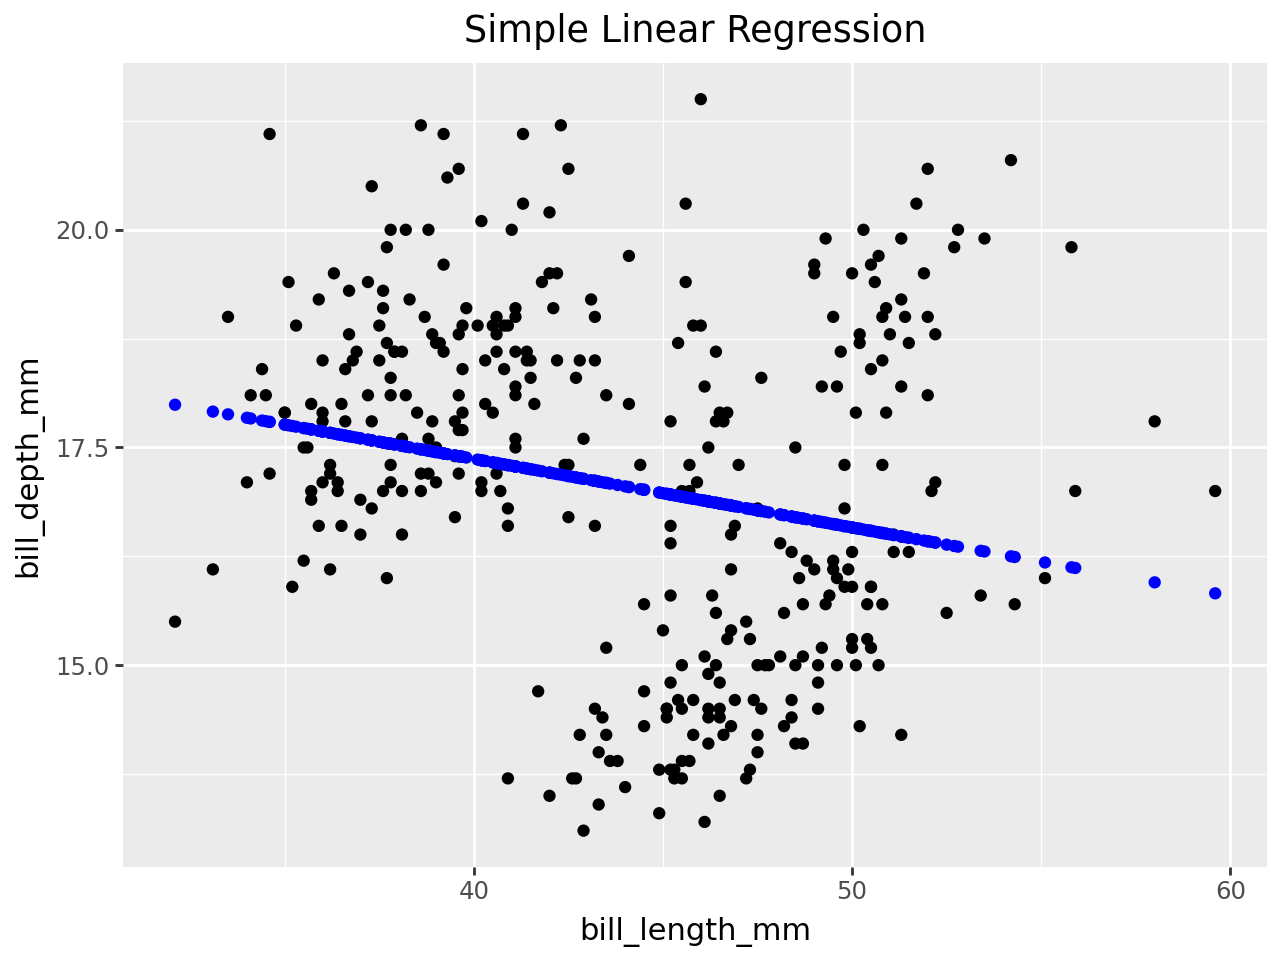

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Simple Linear Regression
y = penguins_df["bill_depth_mm"]
X = penguins_df[["bill_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_lr_test = lr_fit.predict(X_test)
y_lr_train = lr_fit.predict(X_train)

linear_df = pd.DataFrame({"Actual": y_test,
              "Predicted": y_lr_test})

from plotnine import *

pred = lr_fit.predict(X)

# Plot Linear Regression
(ggplot(penguins_df, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+ labs(title="Simple Linear Regression")
+ geom_point(aes(y=pred), color="blue"))

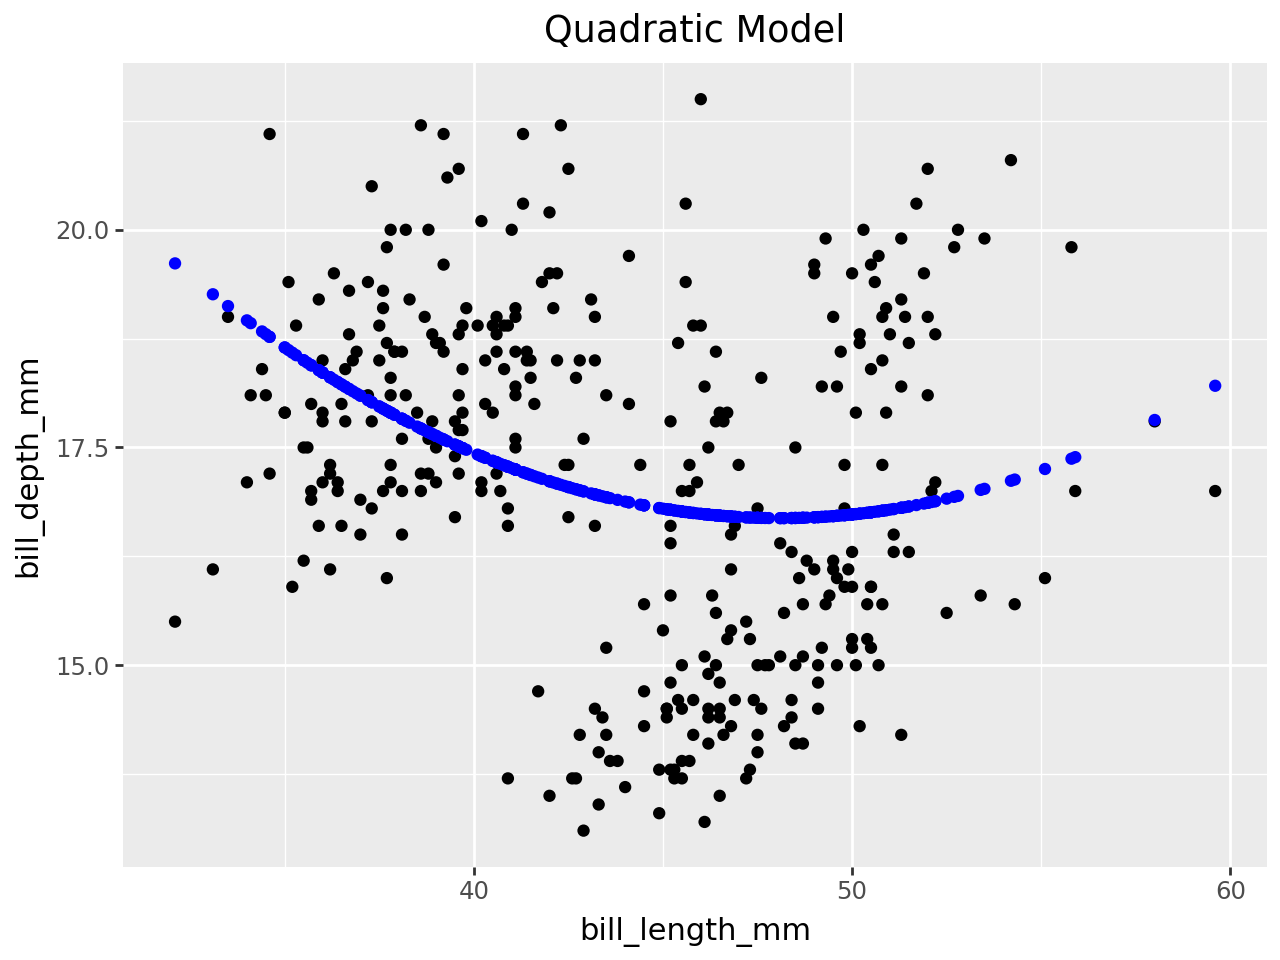

In [26]:
# Quadratic (degree 2 polynomial) model
penguins_df["bill_length_mm_2"] = penguins_df[["bill_length_mm"]] ** 2

y = penguins_df["bill_depth_mm"]
X = penguins_df[["bill_length_mm", "bill_length_mm_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_quad_test = lr_fit.predict(X_test)
y_quad_train = lr_fit.predict(X_train)

quad_df = pd.DataFrame({"Actual": y_test,
              "Predicted": y_quad_test})

pred = lr_fit.predict(X)

(ggplot(penguins_df, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+ labs(title="Quadratic Model")
+ geom_point(aes(y=pred), color="blue"))

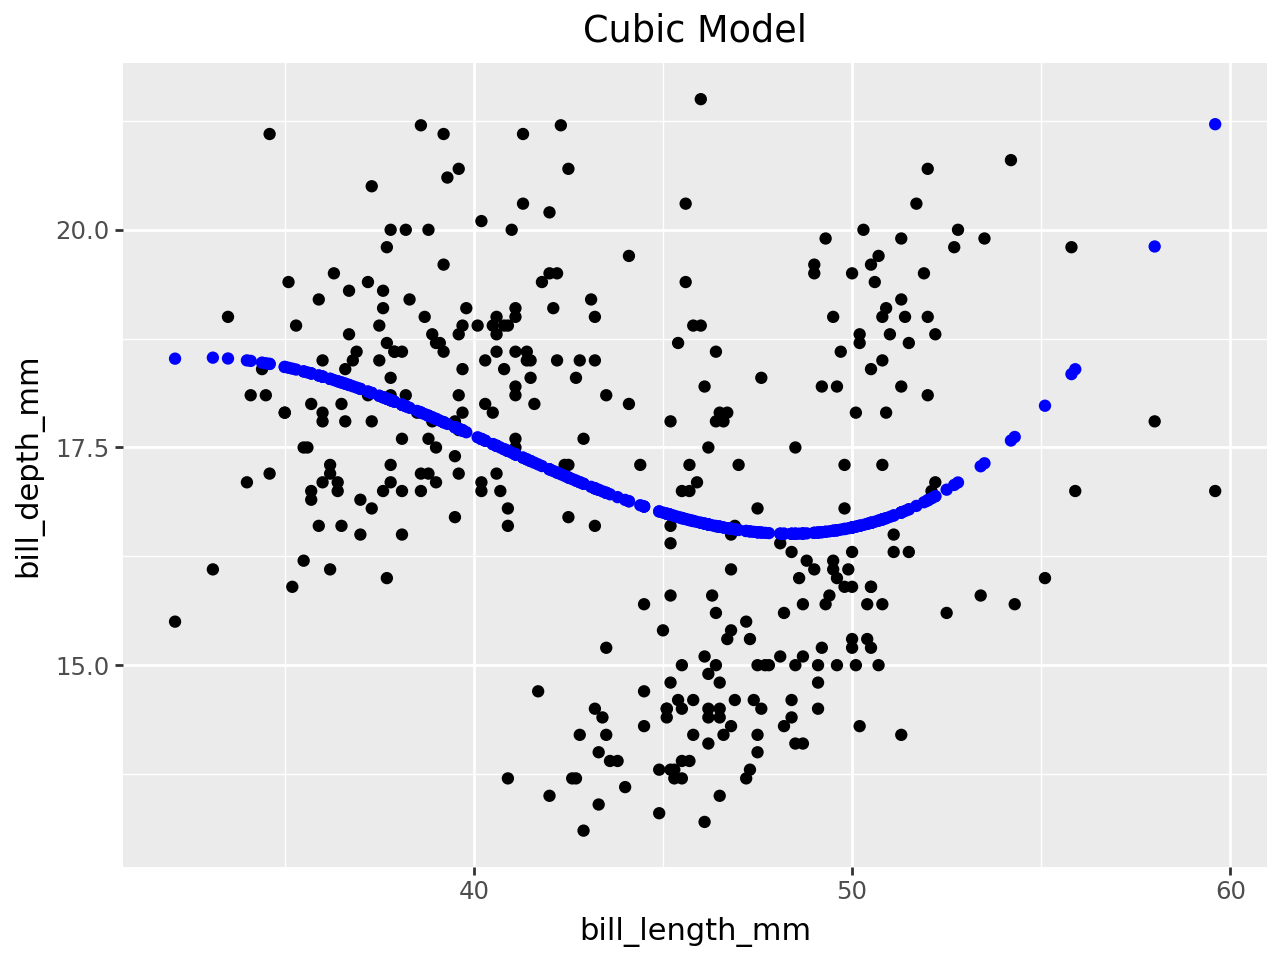

In [27]:
# Cubic (degree 3 polynomial) model
penguins_df["bill_length_mm_3"] = penguins_df[["bill_length_mm"]] ** 3

y = penguins_df["bill_depth_mm"]
X = penguins_df[["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_cubic_test = lr_fit.predict(X_test)
y_cubic_train = lr_fit.predict(X_train)

cubic_df = pd.DataFrame({"Actual": y_test,
              "Predicted": y_cubic_test})

pred = lr_fit.predict(X)

(ggplot(penguins_df, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+ labs(title="Cubic Model")
+ geom_point(aes(y=pred), color="blue"))

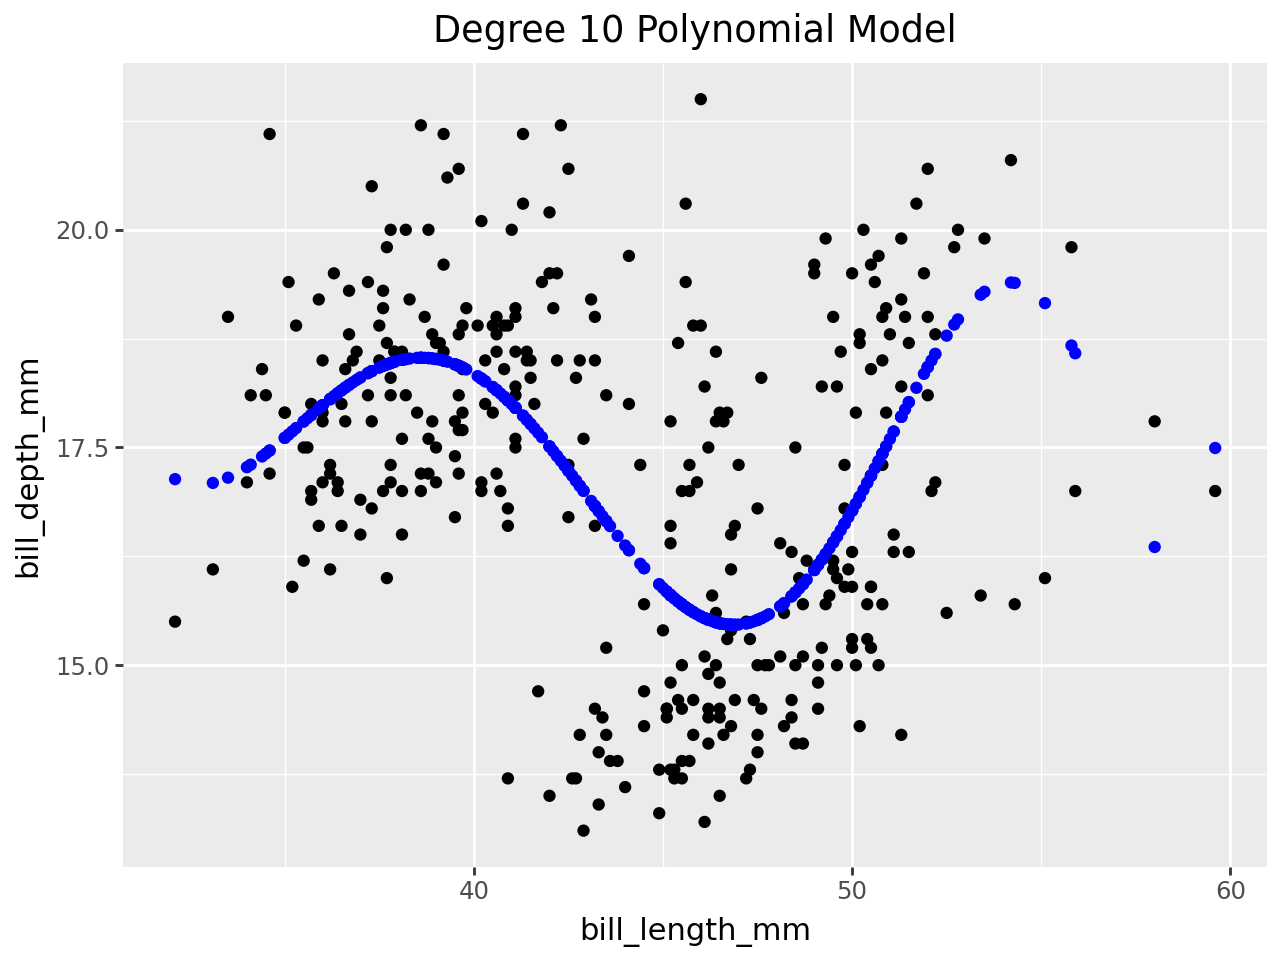

In [28]:
# Degree 10 polynomial model
penguins_df["bill_length_mm_4"] = penguins_df[["bill_length_mm"]] ** 4
penguins_df["bill_length_mm_5"] = penguins_df[["bill_length_mm"]] ** 5
penguins_df["bill_length_mm_6"] = penguins_df[["bill_length_mm"]] ** 6
penguins_df["bill_length_mm_7"] = penguins_df[["bill_length_mm"]] ** 7
penguins_df["bill_length_mm_8"] = penguins_df[["bill_length_mm"]] ** 8
penguins_df["bill_length_mm_9"] = penguins_df[["bill_length_mm"]] ** 9
penguins_df["bill_length_mm_10"] = penguins_df[["bill_length_mm"]] ** 10

y = penguins_df["bill_depth_mm"]
X = penguins_df[["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3",
                 "bill_length_mm_4", "bill_length_mm_5", "bill_length_mm_6",
                 "bill_length_mm_7", "bill_length_mm_8", "bill_length_mm_9",
                 "bill_length_mm_10"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_ten_test = lr_fit.predict(X_test)
y_ten_train = lr_fit.predict(X_train)

ten_df = pd.DataFrame({"Actual": y_test,
              "Predicted": y_ten_test})

pred = lr_fit.predict(X)

(ggplot(penguins_df, aes(x="bill_length_mm", y="bill_depth_mm"))
+ geom_point()
+ labs(title="Degree 10 Polynomial Model")
+ geom_point(aes(y=pred), color="blue"))

In [29]:
from sklearn.metrics import mean_squared_error

# Find MSE for each model
print(mean_squared_error(y_test, y_lr_test))
print(mean_squared_error(y_test, y_quad_test))
print(mean_squared_error(y_test, y_cubic_test))
print(mean_squared_error(y_test, y_ten_test))


3.5739648022699435
3.7503245440887625
3.7864650349934452
2.8237107543596545


In [30]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_lr_test))
print(r2_score(y_test, y_quad_test))
print(r2_score(y_test, y_cubic_test))
print(r2_score(y_test, y_ten_test))

-0.062030364929491766
-0.11443698092183485
-0.1251763980307703
0.16091323535048951


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The Simple Linear Regression, Quadratic, and Cubic models are likely underfitting the data as they have low r-squared values.  
The Degree 10 Polynomial Model may be overfitting the data, as it’s more complex and fits the noise, shown by the oscillations in the fitted line.  
The Degree 10 Polynomial Model technically fits the data best in terms of r-squared, but caution should be exercised due to the potential for overfitting.